<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/Random_Forest_and_Decision_Tree_EV_Manufacturers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install yesg

  Preparing metadata (setup.py) ... done
  Created wheel for yesg: filename=yesg-2.1.1-py3-none-any.whl size=6105 sha256=8bf6ed1199a6daffa75b102989de2dd63fbf4f607cba40673a9dabd3c4996090
  Stored in directory: /root/.cache/pip/wheels/2b/53/0e/129a8d67d809bf89a196f3ea3e56b9df3da4975924157cb1a3
Successfully built yesg


#### In this code, we use the yfinance library to download historical stock price data from Yahoo Finance for the specified companies within the given date range. We then handle missing values by dropping rows that contain any missing values. Next, we perform regression analysis using either Random Forest Regression or Decision Tree Regression, depending on the model chosen. We calculate the alpha and beta coefficients and store the results for each company. Finally, we visualize the feature importances using a bar plot.

#### Please note that the choice of using Random Forest Regression or Decision Tree Regression is commented out in the code. You can uncomment the desired line and comment out the other to switch between the two models.

#### Make sure to install the necessary libraries (pandas, yfinance, scikit-learn, and matplotlib) before running the code. Additionally, please note that the stock symbols used in the code are based on Yahoo Finance tickers. If you encounter any issues with the symbols, you may need to modify them to match the corresponding stock symbols.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Company: TSLA
Feature Importances: [0.09351011 0.05079588 0.1859774  0.46512069 0.01959932 0.03460251
 0.08252904 0.05191626 0.01594879]
--------------------
Company: PSNY
Feature Importances: [0.01081163 0.00522203 0.00880803 0.3835342  0.00333616 0.00219587
 0.14309447 0.44002024 0.00297737]
--------------------
Company: BYDDF
Feature Importances: [0.07718474 0.09457722 0.07657482 0.39892643 0.11958569 0.11249329
 0.04145873 0.01961572 0.05958334]
--------------------
Company: RIVN
Feature Importances: [0.01060715 0.01523192 0.06021541 0.11293593 0.03901867 0.62581121
 0.00808396 0.09053373 0.03756202]
--------------------
Company: NIO
Feature Importances: [0.00661688 0.71124725 0.02890173 0.05949592 0.00885546 0.14772973
 0.02221454 0.00455075 0.01038773]
--------------------
Company: VOLV-B.ST
Feature Importances: [3.39480503e-04 2.10106056e-04 1.07886746e-03 1.21496234e-03
 6.84706481e-04 6.39854432e-03 1.35053638e-03 4.27155970e-04
 9.88295641e-01]
--------------------
Company: G

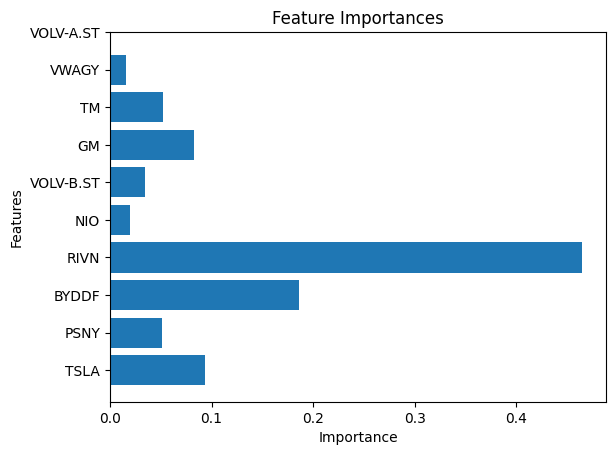

In [25]:
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define the companies of interest
companies = ['TSLA', 'PSNY', 'BYDDF', 'RIVN', 'NIO', 'VOLV-B.ST', 'GM', 'TM', 'VWAGY', 'VOLV-A.ST']

# Define the date range
start_date = '2014-09-01'
end_date = '2024-06-01'

# Create an empty DataFrame to store the stock price data
stock_data = pd.DataFrame()

# Download historical stock price data for each company
for company in companies:
    # Download stock price data from Yahoo Finance
    data = yf.download(company, start=start_date, end=end_date)

    # Extract the 'Close' price and rename the column to the company's symbol
    data = data[['Close']].rename(columns={'Close': company})

    # Append the data to the stock_data DataFrame
    stock_data = pd.concat([stock_data, data], axis=1)

# Handle missing values
stock_data = stock_data.dropna()  # Remove rows with missing values

# Perform regression analysis and calculate feature importances
results = {}

for company in stock_data.columns:
    # Define the independent and dependent variables
    X = stock_data.drop(columns=[company])
    Y = stock_data[company]

    # Perform the random forest regression
    model = RandomForestRegressor()
    model.fit(X, Y)

    # Retrieve the feature importances
    feature_importances = model.feature_importances_

    # Store the results for the company
    results[company] = {'Feature Importances': feature_importances}

# Print the results
for company, result in results.items():
    print(f'Company: {company}')
    print(f'Feature Importances: {result["Feature Importances"]}')
    print('-' * 20)

# Visualize the feature importances
feature_names = list(stock_data.columns)
importances = results[companies[0]]['Feature Importances'][:len(feature_names)]  # Taking feature importances from the first company

plt.barh(range(len(importances)), importances)
plt.yticks(range(len(feature_names)), feature_names)  # Adjusted to use len(feature_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Decision Tree

#### n this code, I have used the DecisionTreeRegressor from the scikit-learn library to perform the regression analysis using a Decision Tree algorithm. After fitting the model, I store the results in a dictionary for each company.

#### To visualize the decision tree, I use the tree.plot_tree function from scikit-learn's tree module. This function generates a visual representation of the decision tree model. I set the feature_names parameter to the columns of the independent variables (X.columns) to label the features correctly.

#### Please note that visualizing decision trees can be challenging if the tree is large. It may be better to focus on a smaller subset of features or consider other visualization techniques depending on the complexity of your data.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


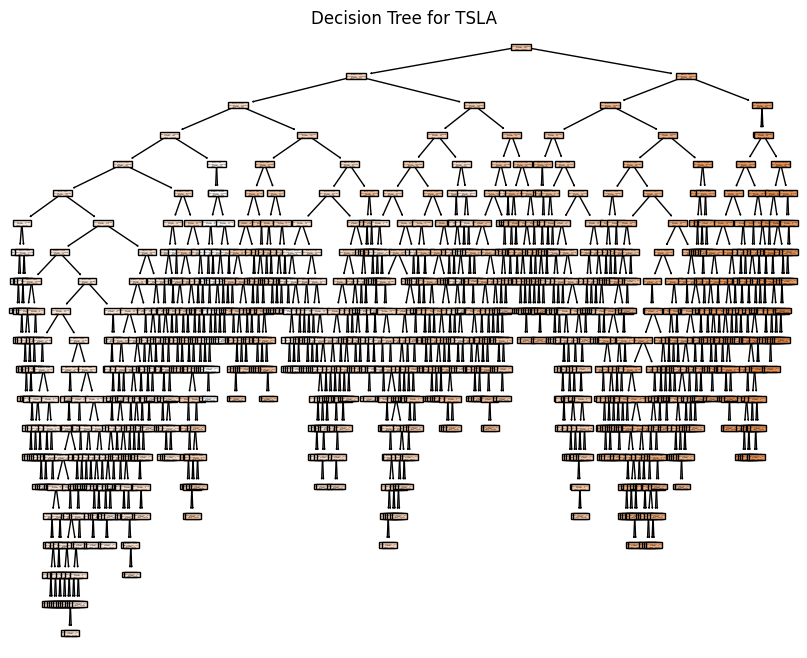

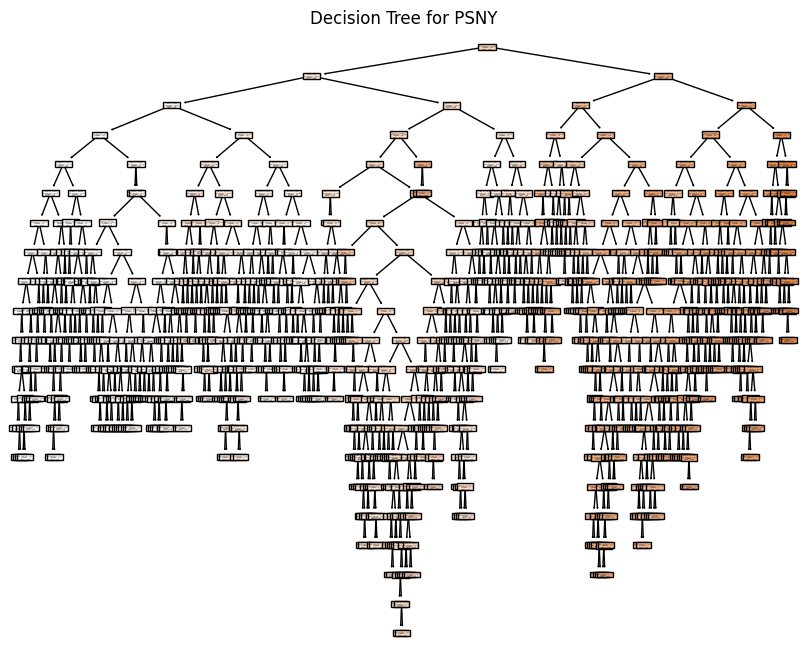

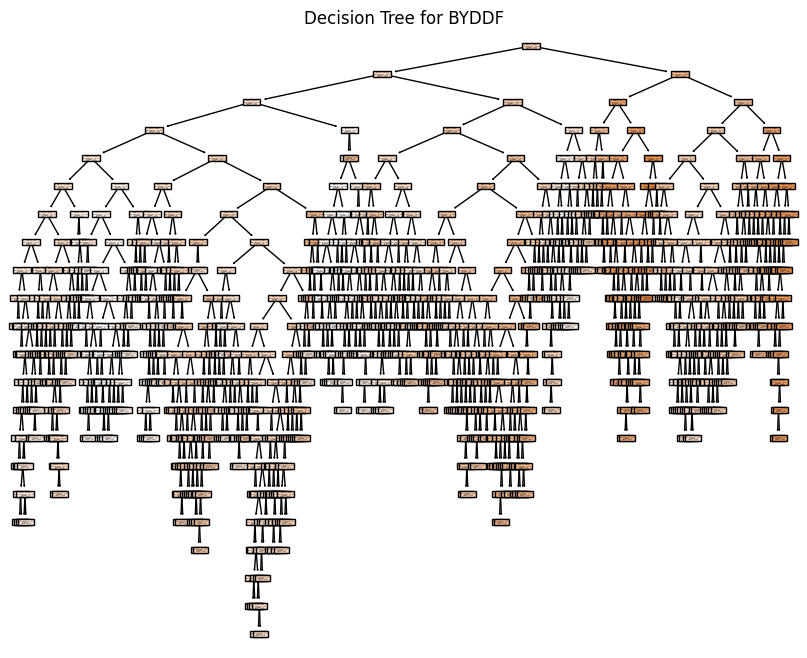

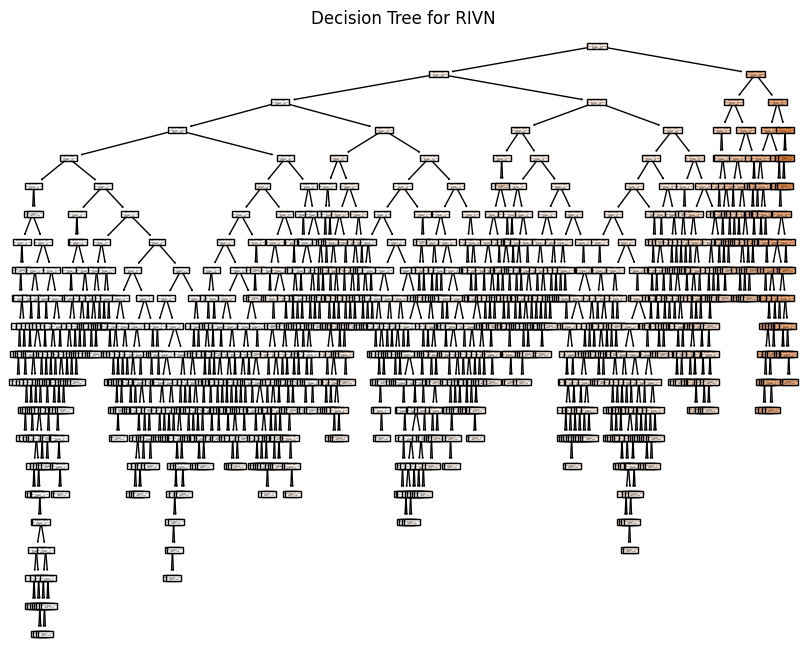

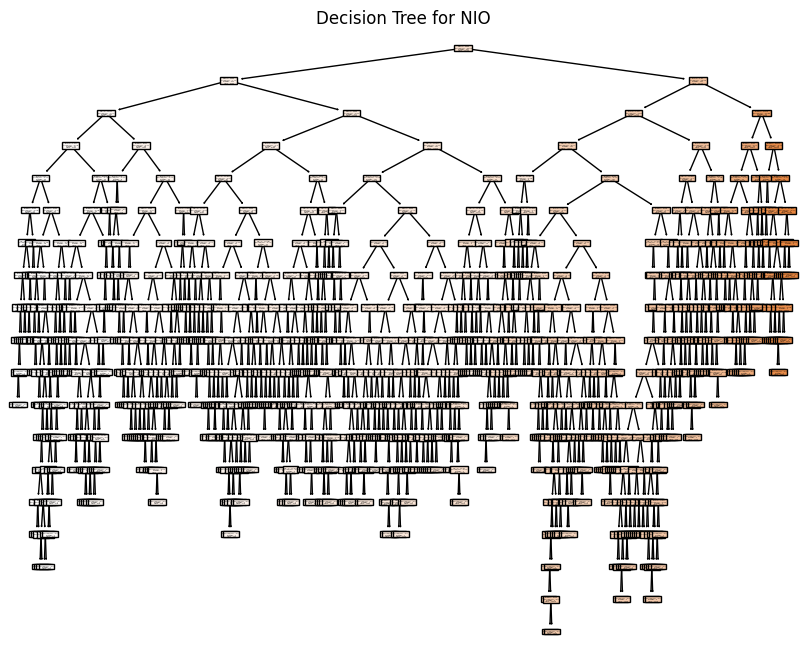

Company: TSLA
Decision Tree Model: DecisionTreeRegressor()
--------------------
Company: PSNY
Decision Tree Model: DecisionTreeRegressor()
--------------------
Company: BYDDF
Decision Tree Model: DecisionTreeRegressor()
--------------------
Company: RIVN
Decision Tree Model: DecisionTreeRegressor()
--------------------
Company: NIO
Decision Tree Model: DecisionTreeRegressor()
--------------------


In [26]:

import pandas as pd
import yfinance as yf
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import tree

# Define the companies of interest
companies = ['TSLA', 'PSNY', 'BYDDF', 'RIVN', 'NIO']

# Define the date range
start_date = '2014-09-01'
end_date = '2024-06-01'

# Create an empty DataFrame to store the stock price data
stock_data = pd.DataFrame()

# Download historical stock price data for each company
for company in companies:
    # Download stock price data from Yahoo Finance
    data = yf.download(company, start=start_date, end=end_date)

    # Extract the 'Close' price and rename the column to the company's symbol
    data = data[['Close']].rename(columns={'Close': company})

    # Append the data to the stock_data DataFrame
    stock_data = pd.concat([stock_data, data], axis=1)

# Handle missing values
stock_data = stock_data.dropna()  # Remove rows with missing values

# Perform regression analysis using Decision Tree and visualize the tree
results = {}

for company in stock_data.columns:
    # Define the independent and dependent variables
    X = stock_data.drop(columns=[company])
    Y = stock_data[company]

    # Perform the decision tree regression
    model = DecisionTreeRegressor()
    model.fit(X, Y)

    # Store the results for the company
    results[company] = {'Model': model}

    # Visualize the decision tree
    plt.figure(figsize=(10, 8))
    tree.plot_tree(model, feature_names=X.columns, filled=True)
    plt.title(f'Decision Tree for {company}')
    plt.show()

# Print the results
for company, result in results.items():
    print(f'Company: {company}')
    print(f'Decision Tree Model: {result["Model"]}')
    print('-' * 20)